In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as lin
import cmath

In [30]:
f = 500
w = f*np.pi*2

Vs = 4
R1 = 3.9E3
R2 = 470
RL = 33

C1 = 480E-9
C2 = 82.8E-9
L = 150E-3
C1z = -1j/(w*C1)
C2z = -1j/(w*C2)
Lz = 1j*w*L

A = np.matrix([[R1**-1 + RL**-1 + R2**-1 + C1z**-1, -R1**-1, -RL**-1],
           [R1**-1, -R1**-1 + -C2z**-1, 0],
            [RL**-1, 0, -RL**-1 + -Lz**-1]])

B = np.matrix([[Vs/C1z], [0], [0]])

sol = lin.solve(A, B)


In [31]:
C1V = [Vs - sol[0], (Vs - sol[0])/C1z]
C2V = [sol[1], sol[1]/C2z]
LV = [sol[2], sol[2]/Lz]
R1V = [sol[0] - sol[1],(sol[0] - sol[1])/R1]
R2V = [sol[0], (sol[0])/R2]
RLV = [sol[0] - sol[2], (sol[0] - sol[2])/RL]


nodes = [cmath.polar(i) for i in sol]
node_num = 2
print(f"node 1: {Vs/np.sqrt(2)}")
for node in nodes:
    print(f"node {node_num}: {node[0]/np.sqrt(2)} < {np.rad2deg(node[1])}")
    node_num+=1
print()
print(f"C1 {cmath.polar(C1V[0])[0]/np.sqrt(2)} < {np.rad2deg(cmath.polar(C1V[0])[1])}")
print(f"C2 {cmath.polar(C2V[0])[0]/np.sqrt(2)} < {np.rad2deg(cmath.polar(C2V[0])[1])}")
print(f"L {cmath.polar(LV[0])[0]/np.sqrt(2)} < {np.rad2deg(cmath.polar(LV[0])[1])}")
print(f"R1 {cmath.polar(R1V[0])[0]/np.sqrt(2)} < {np.rad2deg(cmath.polar(R1V[0])[1])}")
print(f"R2 {cmath.polar(R2V[0])[0]/np.sqrt(2)} < {np.rad2deg(cmath.polar(R2V[0])[1])}")
print(f"RL {cmath.polar(RLV[0])[0]/np.sqrt(2)} < {np.rad2deg(cmath.polar(RLV[0])[1])}")
print()
print(cmath.polar(R2V[0])[0]**2/R2)


node 1: 2.82842712474619
node 2: 1.7393638656160009 < 101.18245977868618
node 3: 1.2210419629264095 < 55.77053962406555
node 4: 1.735114615196785 < 105.18823915103265

C1 3.5963269096304495 < -28.324703833394885
C2 1.2210419629264095 < 55.77053962406555
L 1.735114615196785 < 105.18823915103265
R1 1.2387264354099567 < 145.77053962406555
R2 1.7393638656160009 < 101.18245977868618
RL 0.12150690984940646 < 15.188239151032512

0.012873985774513354


/tmp/ipykernel_576190/2477801806.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nodes = [cmath.polar(i) for i in sol]
/tmp/ipykernel_576190/2477801806.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"C1 {cmath.polar(C1V[0])[0]/np.sqrt(2)} < {np.rad2deg(cmath.polar(C1V[0])[1])}")
/tmp/ipykernel_576190/2477801806.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"C2 {cmath.polar(C2V[0])[0]/np.sqrt(2)} < {np.rad2deg(cmath.polar(C2V[0])[1])}"

/tmp/ipykernel_576190/437849315.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nodes = [cmath.polar(i) for i in sol]


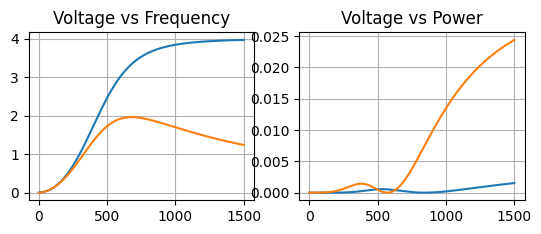

In [ ]:
def feq_vs_voltage(f):
    w = f*np.pi*2

    C1z = -1j/(w*C1)
    C2z = -1j/(w*C2)
    Lz = 1j*w*L

    A = np.matrix([[R1**-1 + RL**-1 + R2**-1 + C1z**-1, -R1**-1, -RL**-1],
            [R1**-1, -R1**-1 + -C2z**-1, 0],
                [RL**-1, 0, -RL**-1 + -Lz**-1]])

    B = np.matrix([[Vs/C1z], [0], [0]])

    sol = lin.solve(A, B)

    C1V = [Vs - sol[0], (Vs - sol[0])/C1z]
    C2V = [sol[1], sol[1]/C2z]
    LV = [sol[2], sol[2]/Lz]
    R1V = [sol[0] - sol[1],(sol[0] - sol[1])/R1]
    R2V = [sol[0], (sol[0])/R2]
    RLV = [sol[0] - sol[2], (sol[0] - sol[2])/RL]


    nodes = [cmath.polar(i) for i in sol]
    return nodes, C1V, C2V, LV, R1V, R2V, RLV

x = np.arange(1, 1500+1, 1)
fv1 = np.zeros(len(x))
fv2 = np.zeros(len(x))
PR1 = np.zeros(len(x))
PR2 = np.zeros(len(x))

for i in range(len(x)):
    fv1[i] = np.real(feq_vs_voltage(x[i])[0][0][0])
    fv2[i] = np.real(feq_vs_voltage(x[i])[0][1][0])
    PR1[i] = np.real(feq_vs_voltage(x[i])[4][0][0])**2/R1
    PR2[i] = np.real(feq_vs_voltage(x[i])[5][0][0])**2/R2

plt.subplot(2,2,1)
plt.plot(x, fv1)
plt.plot(x, fv2)
plt.title("Voltage vs Frequency")
plt.grid()
plt.subplot(2,2,2)
plt.plot(x, PR1)
plt.plot(x, PR2)
plt.title("Voltage vs Power")
plt.grid()
plt.subplot